In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data_frame=pd.read_csv('confirmed_data.csv')

In [4]:
data_frame.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
2,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
4,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0


In [5]:
data_frame.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
566,01-Oct-21,2021-10-01,Confirmed,23918,0,809,54,303,3,2,...,27,4,31,1597,220,21,35,13,708,0
567,02-Oct-21,2021-10-02,Confirmed,23189,1,865,13,246,4,3,...,36,6,25,1578,201,15,0,5,761,0
568,03-Oct-21,2021-10-03,Confirmed,21644,1,765,32,193,3,2,...,24,1,18,1531,162,9,22,12,701,0
569,04-Oct-21,2021-10-04,Confirmed,17101,1,429,27,333,3,6,...,17,4,12,1467,207,6,16,17,601,0
570,05-Oct-21,2021-10-05,Confirmed,19044,2,671,19,385,2,4,...,13,1,24,1449,218,14,20,12,619,0


In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Forecasting for 'TT'(main feature)

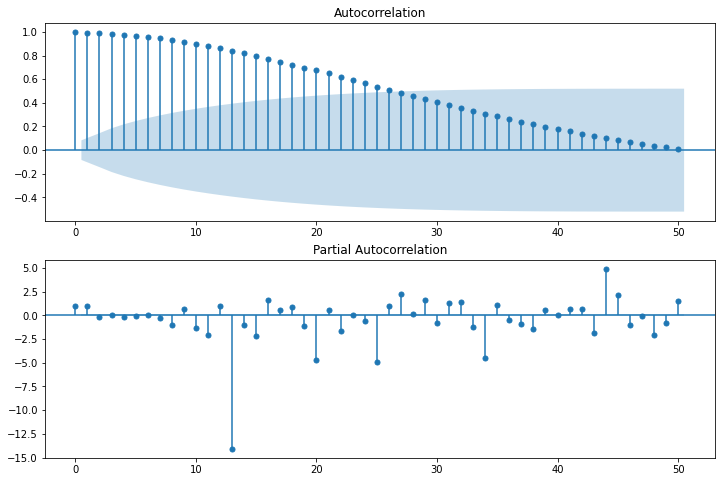

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_frame['TT'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_frame['TT'].iloc[13:],lags=50,ax=ax2)

In [10]:
#p=2
#d=0
#q=1

In [13]:
train_data=data_frame['TT'].loc[0:450]
test_data=data_frame['TT'].loc[451:567]

In [59]:
from statsmodels.tsa.arima.model import ARIMA
#splitting the total cases data.
train_data=data_frame['TT'].loc[0:450]
test_data=data_frame['TT'].loc[451:567]
#initializing the model to train
model=ARIMA(data_frame['TT'],order=(48,0,13));
#training the data and assigned to model_fit var.
model_fit=model.fit()
data=data_frame.copy()
#predicting using test data
data['Forecasted_data']=model_fit.predict(start=451,end=567)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))*100
accuracy=100-mape
print('Accuracy: {}%'.format(round(accuracy,2)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy: 92.37%


In [9]:
#training model for 'TT'
from statsmodels.tsa.arima.model import ARIMA
def training_model(p,d,q):
    #splitting the total cases data.
    train_data=data_frame['TT'].loc[0:450]
    test_data=data_frame['TT'].loc[451:567]
#initializing the model to train
    model=ARIMA(data_frame['TT'],order=(p,d,q));
#training the data and assigned to model_fit var.
    model_fit=model.fit()
    data=data_frame.copy()
#predicting using test data
    data['Forecasted_data']=model_fit.predict(start=451,end=567)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    print('p: {}, d: {}, q:{}'.format(p,d,q))
    print('Accuracy: {}%'.format(round(accuracy,2)))

In [63]:
for p in range(40,50):
    for q in [0,1,2,12,13]:
        training_model(p,0,q)

p: 40, d: 0, q:0
Accuracy: 92.45%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 40, d: 0, q:1
Accuracy: 92.43%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 40, d: 0, q:2
Accuracy: 92.45%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 40, d: 0, q:12
Accuracy: 92.58%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 40, d: 0, q:13
Accuracy: 92.84%
p: 41, d: 0, q:0
Accuracy: 92.4%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 41, d: 0, q:1
Accuracy: 92.44%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 41, d: 0, q:2
Accuracy: 92.44%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 41, d: 0, q:12
Accuracy: 92.5%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 41, d: 0, q:13
Accuracy: 92.51%
p: 42, d: 0, q:0
Accuracy: 92.41%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 42, d: 0, q:1
Accuracy: 92.39%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 42, d: 0, q:2
Accuracy: 92.43%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 42, d: 0, q:12
Accuracy: 92.51%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 42, d: 0, q:13
Accuracy: 92.58%
p: 43, d: 0, q:0
Accuracy: 92.44%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 43, d: 0, q:1
Accuracy: 92.46%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 43, d: 0, q:2
Accuracy: 92.45%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 43, d: 0, q:12
Accuracy: 92.57%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 43, d: 0, q:13
Accuracy: 92.52%
p: 44, d: 0, q:0
Accuracy: 92.46%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 44, d: 0, q:1
Accuracy: 92.43%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 44, d: 0, q:2
Accuracy: 92.43%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 44, d: 0, q:12
Accuracy: 92.58%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 44, d: 0, q:13
Accuracy: 92.49%
p: 45, d: 0, q:0
Accuracy: 92.45%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 45, d: 0, q:1
Accuracy: 92.46%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 45, d: 0, q:2
Accuracy: 92.46%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 45, d: 0, q:12
Accuracy: 92.54%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 45, d: 0, q:13
Accuracy: 92.42%
p: 46, d: 0, q:0
Accuracy: 92.46%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 46, d: 0, q:1
Accuracy: 92.44%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 46, d: 0, q:2
Accuracy: 92.46%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 46, d: 0, q:12
Accuracy: 92.55%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 46, d: 0, q:13
Accuracy: 92.48%
p: 47, d: 0, q:0
Accuracy: 92.48%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 47, d: 0, q:1
Accuracy: 92.38%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 47, d: 0, q:2
Accuracy: 92.5%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 47, d: 0, q:12
Accuracy: 92.45%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 47, d: 0, q:13
Accuracy: 92.48%
p: 48, d: 0, q:0
Accuracy: 92.47%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 48, d: 0, q:1
Accuracy: 92.58%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 48, d: 0, q:2
Accuracy: 92.59%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 48, d: 0, q:12
Accuracy: 92.55%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 48, d: 0, q:13
Accuracy: 92.37%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:0
Accuracy: 92.52%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:1
Accuracy: 92.52%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:2
Accuracy: 92.56%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:12
Accuracy: 92.37%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 49, d: 0, q:13
Accuracy: 92.32%


In [66]:
#p=40,d=0,q=13 got 92.84% accuracy for ARIMA model.
#so we use p,d,q values as 40,0,13

In [11]:
#ARIMA model training for Total cases
india_model=training_model(p=40,d=0,q=13)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 40, d: 0, q:13
Accuracy: 92.88%


In [12]:
#saving the model
import pickle
with open('india_model.pkl','wb') as file:
    pickle.dump(india_model,file)

In [71]:
#SARIMA is used for the features which are not stationary.
#ARIMA is used for the features which are stationary.

In [15]:
from statsmodels.tsa.arima.model import ARIMA
def ARIMA_model(p,d,q,cols):
    #splitting the total cases data.
    train_data=data_frame[cols].loc[0:450]
    test_data=data_frame[cols].loc[451:567]
#initializing the model to train
    model=ARIMA(data_frame[cols],order=(p,d,q));
#training the data and assigned to model_fit var.
    model_fit=model.fit()
    data=data_frame.copy()
#predicting using test data
    data['Forecasted_data']=model_fit.predict(start=451,end=567)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted_data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    print('p: {}, d: {}, q:{}'.format(p,d,q))
    print('Accuracy: {}%'.format(round(accuracy,2)))
    return model_fit

In [73]:
stationary_cols=['TT', 'AP', 'BR', 'CT', 'DN', 'DL', 'GA', 'GJ', 'HP', 'JK', 'JH', 'KL', 'MP', 'MH', 'OR', 'PY', 'PB', 'RJ', 'TR', 'UP', 'UT', 'WB', 'UN']

ACF and PACF for  TT


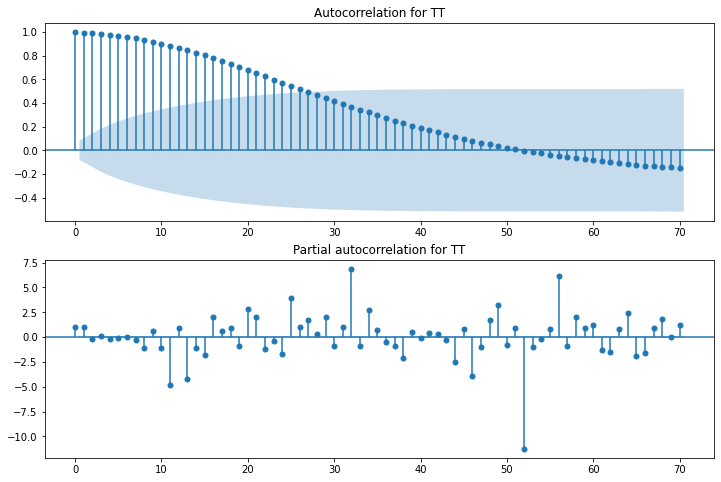

----------------------------------------------------------------------------------------------
ACF and PACF for  AP


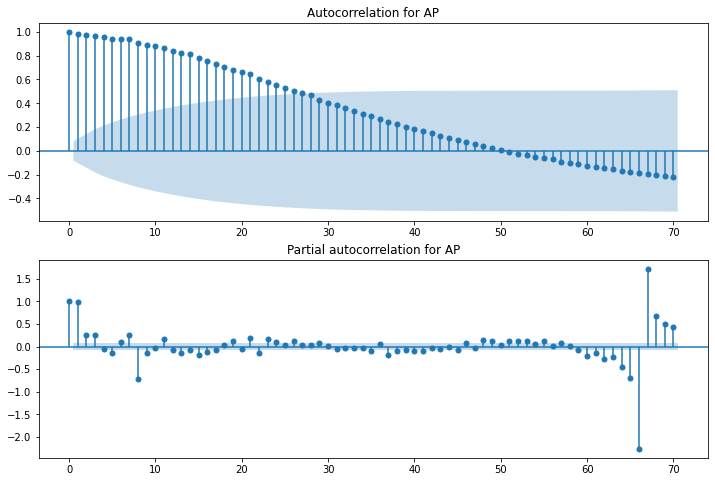

----------------------------------------------------------------------------------------------
ACF and PACF for  BR


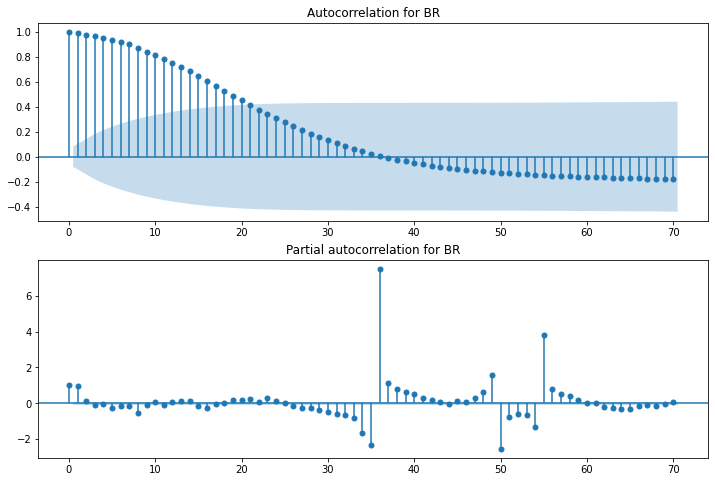

----------------------------------------------------------------------------------------------
ACF and PACF for  CT


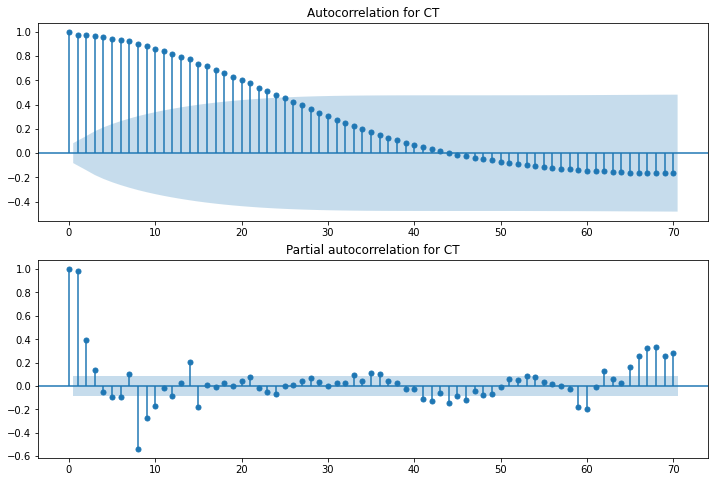

----------------------------------------------------------------------------------------------
ACF and PACF for  DN


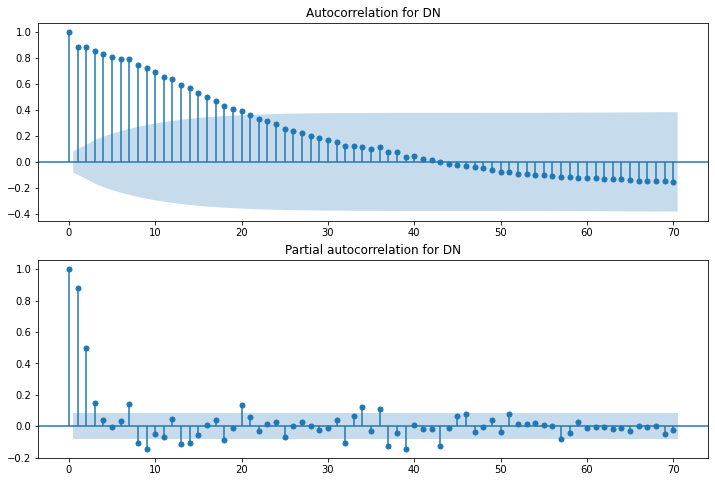

----------------------------------------------------------------------------------------------
ACF and PACF for  DL


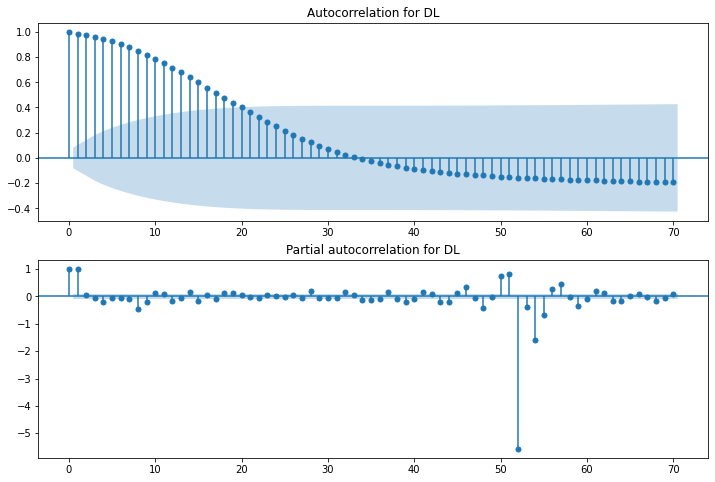

----------------------------------------------------------------------------------------------
ACF and PACF for  GA


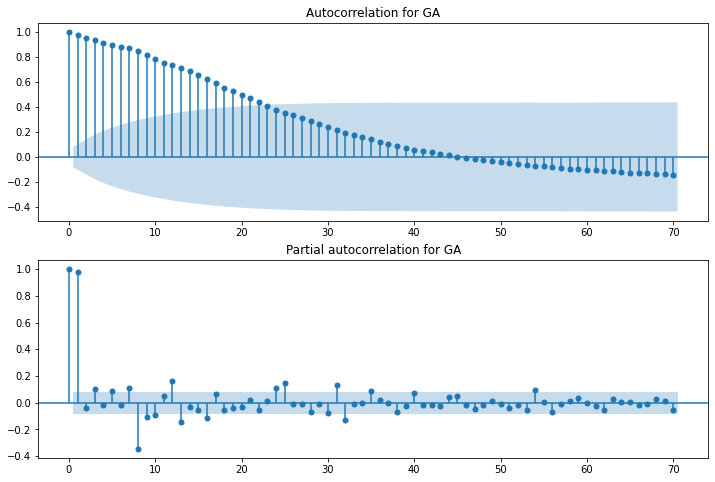

----------------------------------------------------------------------------------------------
ACF and PACF for  GJ


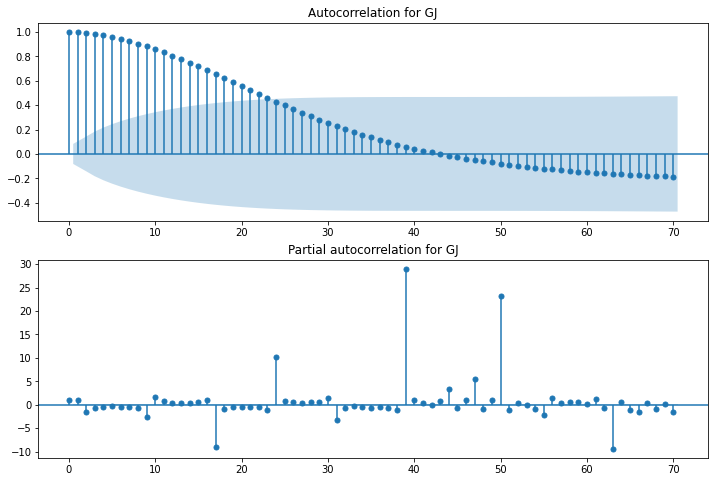

----------------------------------------------------------------------------------------------
ACF and PACF for  HP


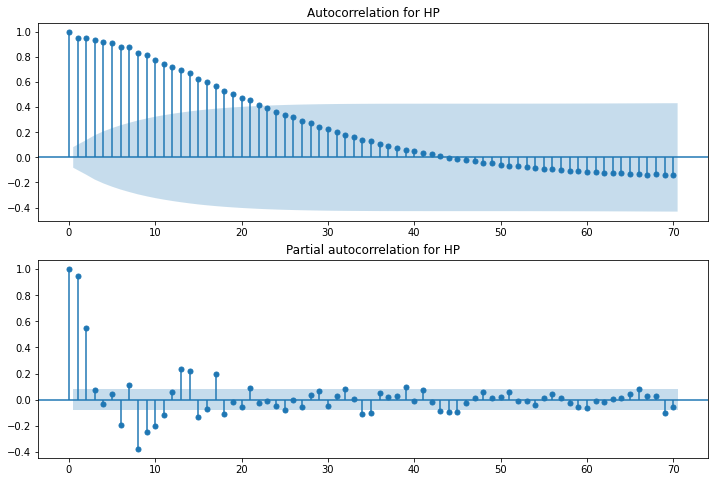

----------------------------------------------------------------------------------------------
ACF and PACF for  JK


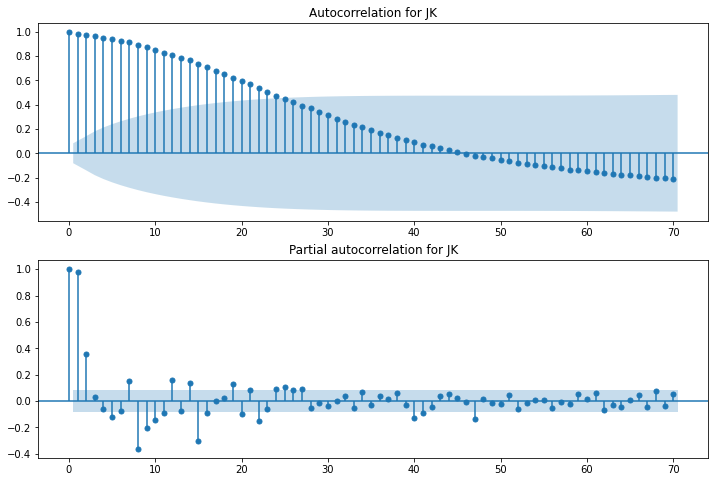

----------------------------------------------------------------------------------------------
ACF and PACF for  JH


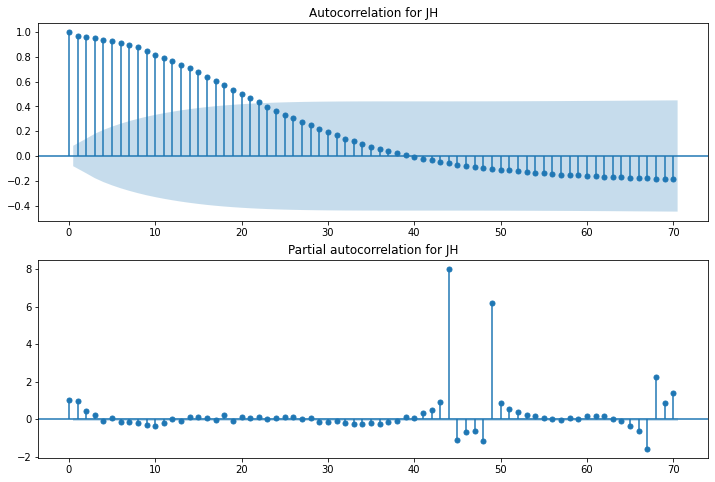

----------------------------------------------------------------------------------------------
ACF and PACF for  KL


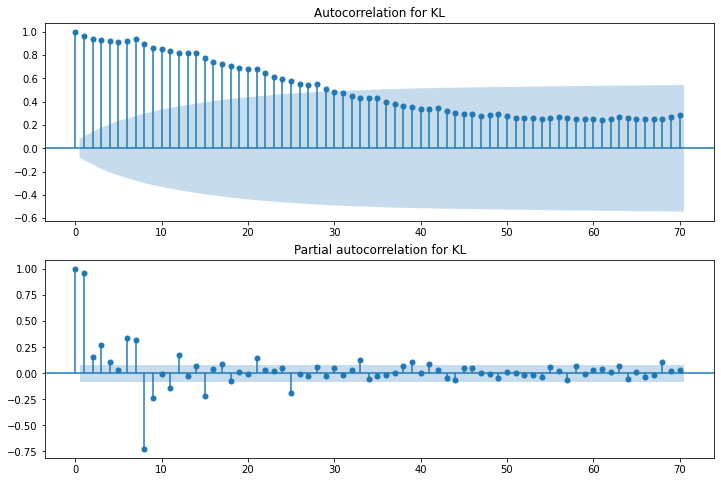

----------------------------------------------------------------------------------------------
ACF and PACF for  MP


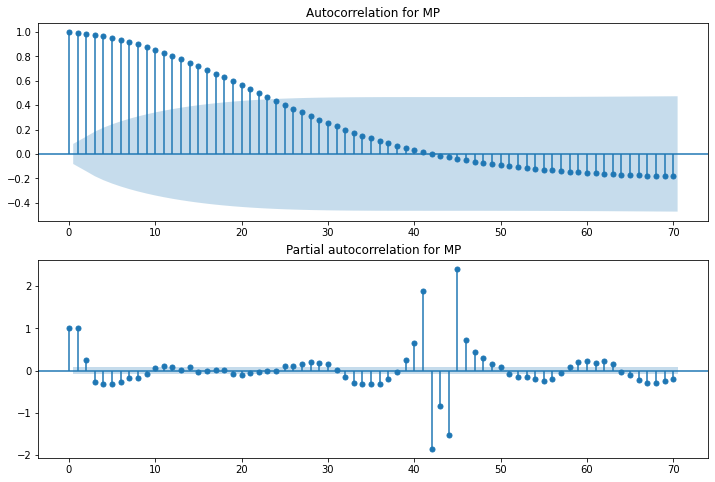

----------------------------------------------------------------------------------------------
ACF and PACF for  MH


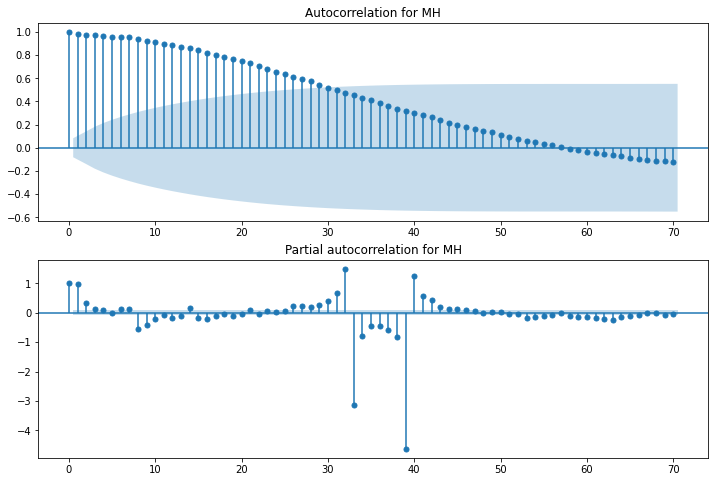

----------------------------------------------------------------------------------------------
ACF and PACF for  OR


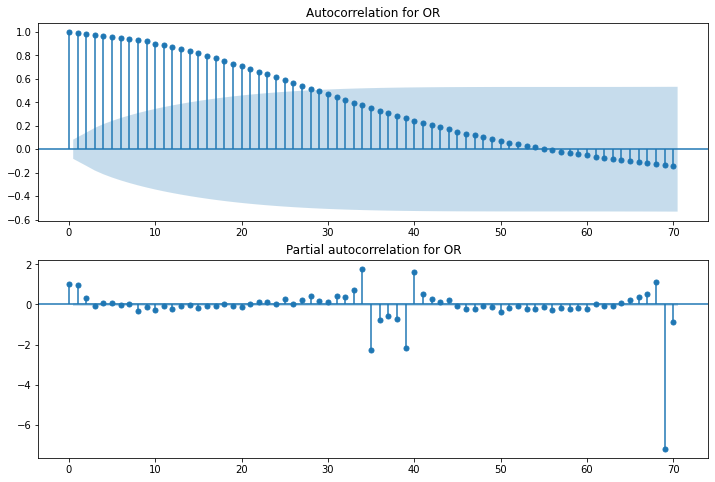

----------------------------------------------------------------------------------------------
ACF and PACF for  PY


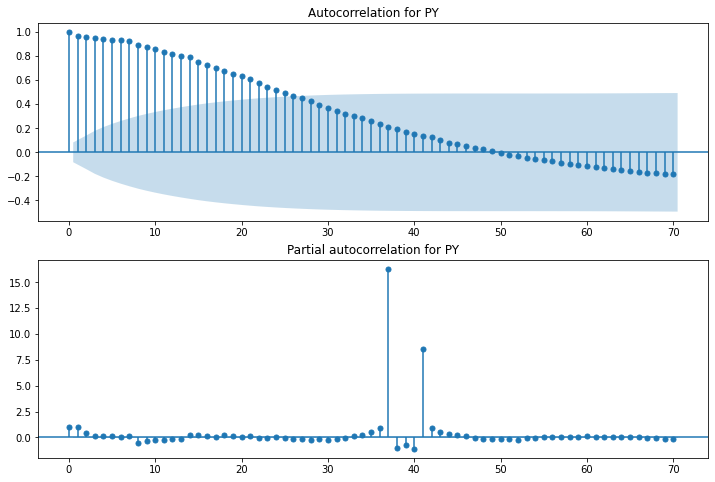

----------------------------------------------------------------------------------------------
ACF and PACF for  PB


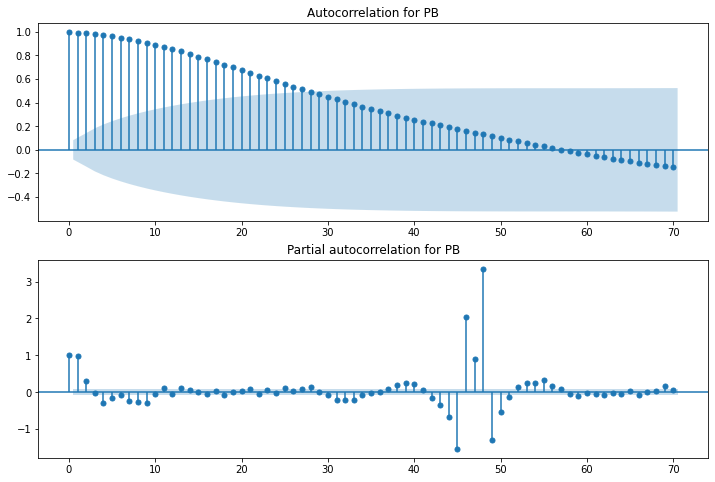

----------------------------------------------------------------------------------------------
ACF and PACF for  RJ


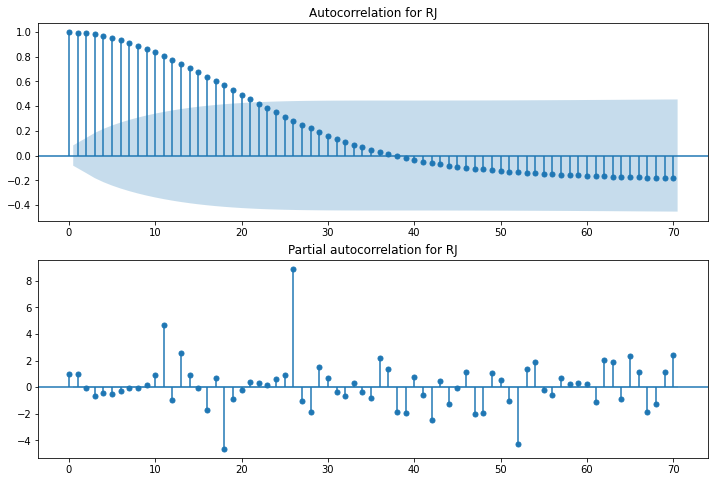

----------------------------------------------------------------------------------------------
ACF and PACF for  TR


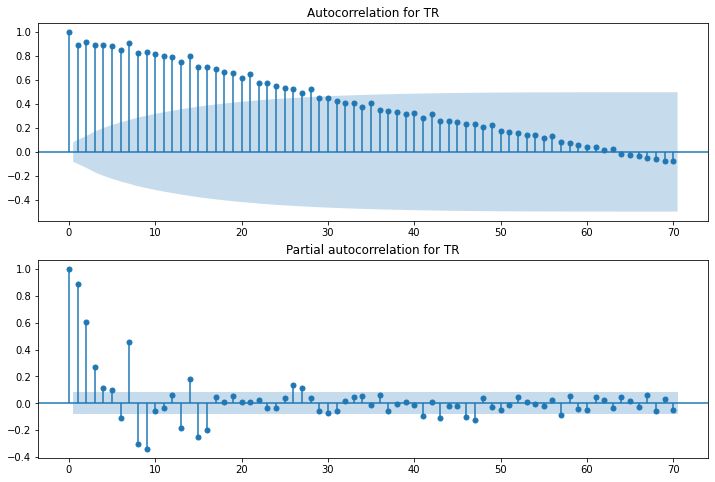

----------------------------------------------------------------------------------------------
ACF and PACF for  UP


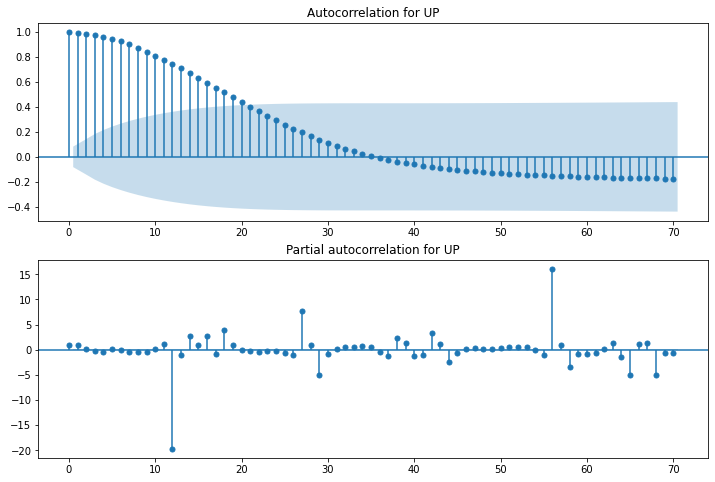

----------------------------------------------------------------------------------------------
ACF and PACF for  UT


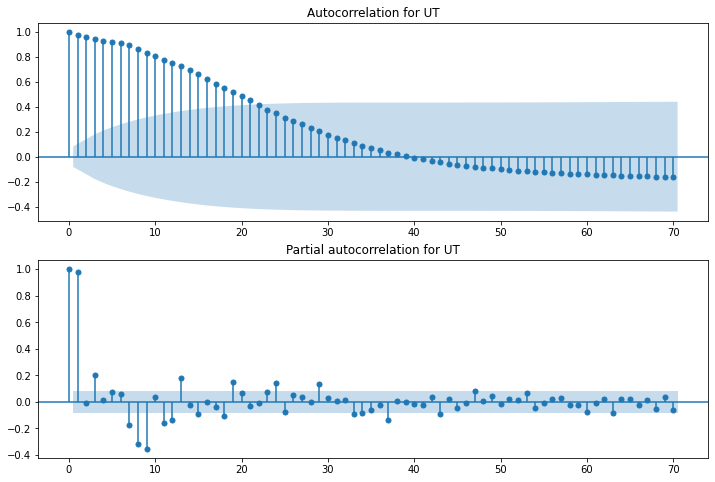

----------------------------------------------------------------------------------------------
ACF and PACF for  WB


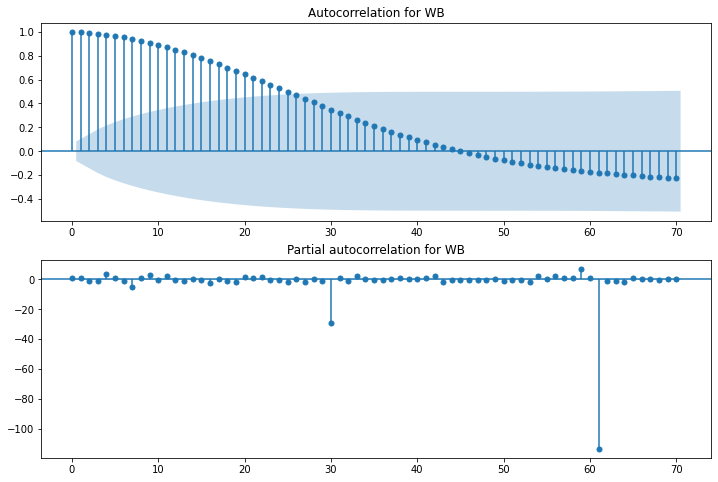

----------------------------------------------------------------------------------------------
ACF and PACF for  UN


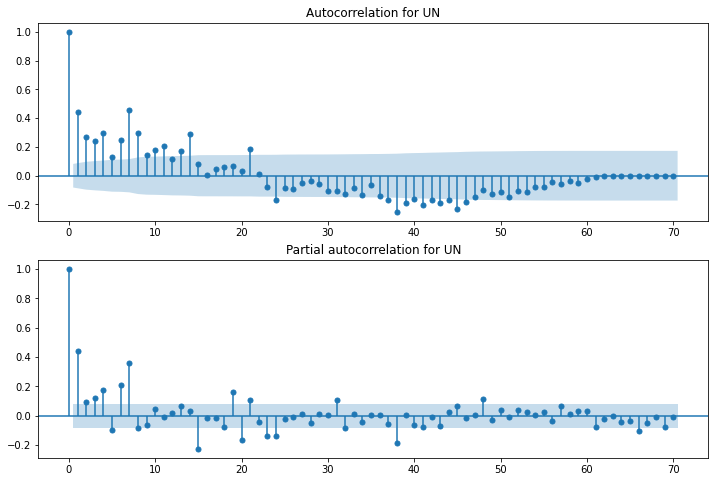

----------------------------------------------------------------------------------------------


In [77]:
#plotting acf and pacf plots for region or state columns
for cols in stationary_cols:
    print('ACF and PACF for ',cols)
    #if short_forms[i]!='DD':
    try:
        #cols=short_forms[i]
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(211)
        fig = plot_acf(data_frame[cols],lags=70,ax=ax1,title='Autocorrelation for '+cols)
        ax2 = fig.add_subplot(212)
        fig = plot_pacf(data_frame[cols],lags=70,ax=ax2,title='Partial autocorrelation for '+cols)
        
        plt.show()
        
    except:
        #'DD' feature cannot be plotted for acf and pacf due to the inconsistent values in it. It does not contain any value to plot
        print('This feature cannot be plotted for autocorrelation and partial autocorrelation')
    print('----------------------------------------------------------------------------------------------')

In [82]:
#p,d,q values for the features 
tt_values=[40,0,13]
ap_values=[48,0,2]
br_values=[35,0,36]
ct_values=[42,0,2]
dn_values=[39,0,3]
dl_values=[32,0,2]
ga_values=[42,0,2]
gj_values=[41,0,17]
hp_values=[42,0,3]
jk_values=[44,0,2]
jh_values=[38,0,44]
kl_values=[62,0,2]
mp_values=[40,0,2]
mh_values=[55,0,33]
or_values=[54,0,35]
py_values=[48,0,37]
pb_values=[55,0,2]
rj_values=[37,0,11]
tr_values=[62,0,9]
up_values=[34,0,12]
ut_values=[38,0,2]
wb_values=[44,0,30]
un_values=None

In [83]:
stationary_features_pdq_values=[tt_values,ap_values,br_values,ct_values,dn_values,dl_values,ga_values,
                               gj_values,hp_values,jk_values,jh_values,kl_values,mp_values,mh_values,or_values,
                               py_values,pb_values,rj_values,tr_values,up_values,ut_values,wb_values,un_values]

In [87]:
for cols,values in zip(stationary_cols,stationary_features_pdq_values):
    print('Column name: ',cols)
    p_value=values[0]
    d_value=values[1]
    q_value=values[2]
    ARIMA_model(p_value,d_value,q_value,cols)
    print('---------------------------------------------------------------------------------')
    print('---------------------------------------------------------------------------------')

Column name:  TT
p: 40, d: 0, q:13
Accuracy: 92.84%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Column name:  AP
p: 48, d: 0, q:2
Accuracy: 88.27%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Column name:  BR
p: 35, d: 0, q:36
Accuracy: -156.2%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Column name:  CT
p: 42, d: 0, q:2
Accuracy: 14.91%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Column name:  DN
p: 39, d: 0, q:3
Accuracy: -inf%
---------------------------------------------------------------------------------
-----

TypeError: 'NoneType' object is not subscriptable

In [89]:
regions_with_accuracy=['AP','CT','GA','HP','JK','KL','MH','OR','PY','PB','WB']

## ARIMA for 'AP'

In [90]:
ARIMA_model(50,0,66,'AP')

p: 50, d: 0, q:66
Accuracy: 89.55%


In [93]:
for p in range(40,50):
    for q in [66,67]:
        ARIMA_model(p,0,q,'AP')

p: 40, d: 0, q:66
Accuracy: 88.42%
p: 40, d: 0, q:67
Accuracy: 88.35%
p: 41, d: 0, q:66
Accuracy: 88.96%
p: 41, d: 0, q:67
Accuracy: 89.0%
p: 42, d: 0, q:66
Accuracy: 89.22%
p: 42, d: 0, q:67
Accuracy: 89.2%
p: 43, d: 0, q:66
Accuracy: 89.38%
p: 43, d: 0, q:67
Accuracy: 89.35%
p: 44, d: 0, q:66
Accuracy: 89.52%
p: 44, d: 0, q:67
Accuracy: 89.4%
p: 45, d: 0, q:66
Accuracy: 89.48%
p: 45, d: 0, q:67
Accuracy: 89.6%
p: 46, d: 0, q:66
Accuracy: 89.19%
p: 46, d: 0, q:67
Accuracy: 89.39%
p: 47, d: 0, q:66
Accuracy: 89.29%
p: 47, d: 0, q:67
Accuracy: 89.32%
p: 48, d: 0, q:66
Accuracy: 89.11%
p: 48, d: 0, q:67
Accuracy: 89.2%
p: 49, d: 0, q:66
Accuracy: 89.13%
p: 49, d: 0, q:67
Accuracy: 89.27%


In [95]:
for q in [66,67]:
    ARIMA_model(50,0,q,'AP')

p: 50, d: 0, q:66
Accuracy: 89.55%
p: 50, d: 0, q:67
Accuracy: 89.49%


In [16]:
# Final parameters and models for Total cases in India and in AP.
print('For TT feature')
india_model=ARIMA_model(40,0,13,'TT')
print('For AP feature')
ap_model=ARIMA_model(50,0,66,'AP')

For TT feature


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 40, d: 0, q:13
Accuracy: 92.88%
For AP feature


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 50, d: 0, q:66
Accuracy: 89.48%


In [17]:
#saving the models
import pickle
with open('india_model_confirmed.pkl','wb') as file:
    pickle.dump(india_model,file)
    
with open('ap_model_confirmed.pkl','wb') as file:
    pickle.dump(ap_model,file)


In [18]:
with open('india_model_confirmed.pkl','rb') as file:
    load_model=pickle.load(file)

In [155]:
data=data_frame.copy()
data['Overall_forecasted_cases']=india_model.predict(start=451,end=567)
data['ap_forecasted_cases']=ap_model.predict(start=451,end=567)

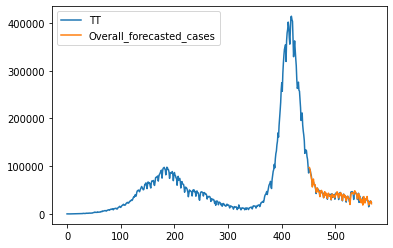

In [156]:
data[['TT','Overall_forecasted_cases']].plot();

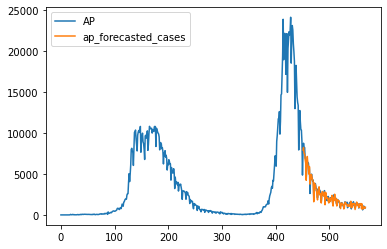

In [160]:
data[['AP','ap_forecasted_cases']].plot();

In [170]:
future_dates=range(568,701)

In [171]:
future_data=pd.DataFrame(index=future_dates,columns=data.columns)

In [173]:
final_data=pd.concat([data,future_data])

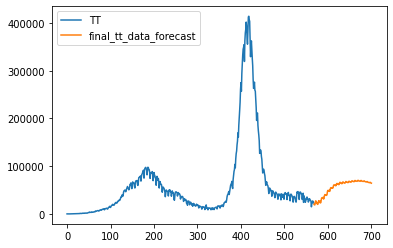

In [179]:
final_data['final_tt_data_forecast']=india_model.predict(start=568,end=701,dynamic=True)
final_data[['TT','final_tt_data_forecast']].plot();

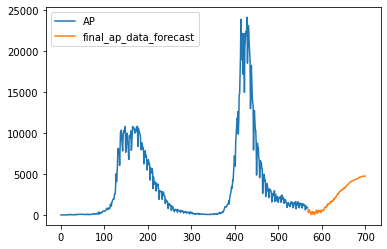

In [254]:
final_data['final_ap_data_forecast']=ap_model.predict(start=568,end=701,dynamic=True)
final_data[['AP','final_ap_data_forecast']].plot();

In [224]:
final_data[final_data['Date_YMD'].isnull()==True]

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,TR,UP,UT,WB,UN,Overall_forecasted_cases,ap_forecasted_cases,final_tt_data_forcast,final_tt_data_forecast,final_ap_data_forecast
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20111.233213,20111.233213,555.433160
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18845.015665,18845.015665,320.428479
570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19087.215899,19087.215899,279.815528
571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24998.143864,24998.143864,653.503467
572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27460.647739,27460.647739,412.022332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65593.659043,65593.659043,4716.701043
697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66257.929397,66257.929397,4748.443489
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65801.870472,65801.870472,4729.876686
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64720.959082,64720.959082,4724.301592


In [229]:
final_data['Date_YMD'].iloc[568:]=pd.date_range(start='2021-10-03',periods=133,freq='D')

In [230]:
final_data

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,TR,UP,UT,WB,UN,Overall_forecasted_cases,ap_forecasted_cases,final_tt_data_forcast,final_tt_data_forecast,final_ap_data_forecast
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,0,12,0,0,0,NaN,NaN,NaN,NaN,NaN
1,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN
2,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
3,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,2,0,1,0,NaN,NaN,NaN,NaN,NaN
4,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,0,2,1,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,NaN,2022-02-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65593.659043,65593.659043,4716.701043
697,NaN,2022-02-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66257.929397,66257.929397,4748.443489
698,NaN,2022-02-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65801.870472,65801.870472,4729.876686
699,NaN,2022-02-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64720.959082,64720.959082,4724.301592


In [236]:
final_data['Date_YMD']=pd.to_datetime(final_data['Date_YMD'])

In [246]:
final_total_forecast_data=pd.concat([final_data['TT'].dropna(),final_data['final_tt_data_forecast'].dropna()])

## Final forecast of daily cases of overall India.

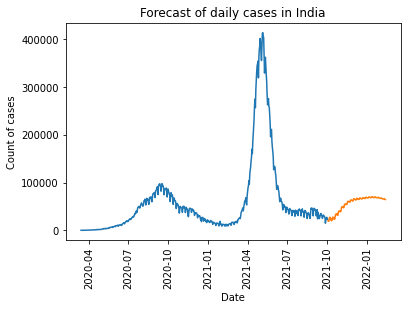

In [264]:
plt.title('Forecast of daily cases in India')
plt.plot(final_data['Date_YMD'],final_data[['TT','final_tt_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');

## Final forecast of daily cases in AP.

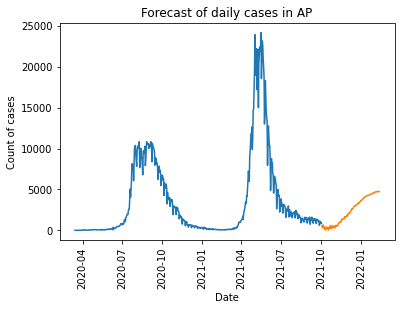

In [261]:
#final_total_forecast_data=pd.concat([final_data['AP'].dropna(),final_data['final_ap_data_forecast'].dropna()])
plt.title('Forecast of daily cases in AP')
plt.plot(final_data['Date_YMD'],final_data[['AP','final_ap_data_forecast']]);
plt.xticks(rotation=90);
plt.xlabel('Date');
plt.ylabel('Count of cases');

In [265]:
final_data.to_csv('final_data.csv',index=False)